### One-way repeated measure ANOVA



In [ ]:
## Load and visualize the dataset

In [10]:
import pandas as pd
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
df

,Id,W1,W2,W3,W4,W5
0,P1,4,5,6,8,10
1,P2,3,4,6,6,9
2,P3,6,7,9,10,12
3,P4,5,7,8,10,12
4,P5,5,6,7,8,10


In [11]:
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['W1', 'W2', 'W3', 'W4', 'W5'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'leaves']
df_melt.head(2)

,Id,time_points,leaves
0,P1,W1,4
1,P2,W1,3


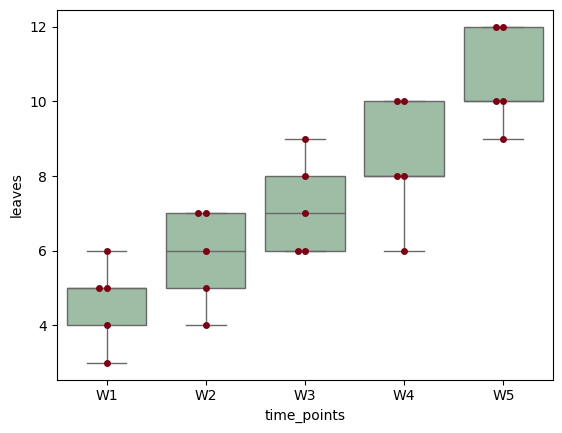

In [12]:
# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='time_points', y='leaves', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="time_points", y="leaves", data=df_melt, color='#7d0013')
plt.show()

In [13]:
# Perform one-way repeated measure ANOVA

In [14]:
import pingouin as pg
res = pg.rm_anova(dv='leaves', within='time_points', subject='Id', data=df_melt, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time_points,108.24,4,27.060,146.27027,2.214820e-12,0.744224,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


In [15]:
### Post-hoc tests

In [16]:
# install pingouin as !pip install pingouin
# make sure you have installed the pingouin package (pip install pingouin)
post_hocs = pg.pairwise_ttests(dv='leaves', within='time_points', subject='Id', padjust='fdr_bh', data=df_melt)
post_hocs

/home/xenakas/.venv/lib/python3.11/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time_points,W1,W2,True,True,-6.000000,4.0,two-sided,0.003883,0.004853,fdr_bh,13.991,-0.884977
1,time_points,W1,W3,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.917450
2,time_points,W1,W4,True,True,-10.155927,4.0,two-sided,0.000529,0.000756,fdr_bh,60.047,-2.397193
3,time_points,W1,W5,True,True,-18.973666,4.0,two-sided,0.000045,0.000227,fdr_bh,369.333,-4.352931
4,time_points,W2,W3,True,True,-5.715476,4.0,two-sided,0.004636,0.005151,fdr_bh,12.3,-0.969840
5,time_points,W2,W4,True,True,-10.614456,4.0,two-sided,0.000446,0.000743,fdr_bh,68.116,-1.565591
6,time_points,W2,W5,True,True,-24.000000,4.0,two-sided,0.000018,0.000179,fdr_bh,740.006,-3.277318
7,time_points,W3,W4,True,True,-3.207135,4.0,two-sided,0.032678,0.032678,fdr_bh,3.006,-0.722581
8,time_points,W3,W5,True,True,-13.880442,4.0,two-sided,0.000156,0.000521,fdr_bh,147.775,-2.321433
9,time_points,W4,W5,True,True,-11.000000,4.0,two-sided,0.000388,0.000743,fdr_bh,75.445,-1.310253


/home/xenakas/.venv/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [17]:
# Check repeated measure ANOVA assumptions
## Assumption of sphericity

In [18]:
# install pingouin as !pip install pingouin
# Mauchly’s test of sphericity
import pingouin as pg
pg.sphericity(data=df_melt, dv='leaves', subject='Id', within='time_points')

/tmp/ipykernel_87582/1302510118.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  pg.sphericity(data=df_melt, dv='leaves', subject='Id', within='time_points')


SpherResults(spher=True, W=0.13339302226436223, chi2=4.868267346520249, dof=9, pval=0.8883022484983506)

In [19]:
## Assumption of normality

In [20]:
pg.normality(data=df_melt, dv='leaves', group='time_points')

,W,pval,normal
time_points,,,
W1,0.960859,0.813952,True
W2,0.902020,0.421149,True
W3,0.902020,0.421149,True
W4,0.881038,0.314040,True
W5,0.851907,0.200623,True


### Two-way repeated measure ANOVA (Within-within-subjects ANOVA)


In [21]:
## Load and visualize the dataset

In [22]:
import pandas as pd
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves_two_within.csv")
df


,plants,nutrient_level,year,time,num_leaves
0,P1,Low,Year1,Week1,4
1,P2,Low,Year1,Week1,3
2,P3,Low,Year1,Week1,6
3,P4,Low,Year1,Week1,5
4,P5,Low,Year1,Week1,5
5,P1,Low,Year1,Week2,5
6,P2,Low,Year1,Week2,4
7,P3,Low,Year1,Week2,7
8,P4,Low,Year1,Week2,7
9,P5,Low,Year1,Week2,6


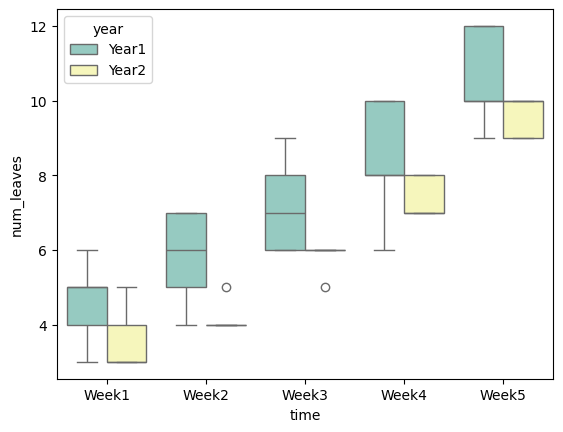

In [23]:
# In this dataset, there are two independent variables (time and year) and number of leaves (num_leaves)
# is a dependent variable

# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="time", y="num_leaves", hue="year", data=df, palette="Set3")
plt.show()

In [24]:
## Perform two-way repeated measure ANOVA

In [25]:
# install pingouin as !pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='num_leaves', within=['time', 'year'], subject='plants', 
                  data=df, detailed=True)
res

/home/xenakas/.venv/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/home/xenakas/.venv/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,226.88,4,16,56.72,158.657343,1.177428e-12,0.000003,0.836331,0.421229
1,year,18.00,1,4,18.00,3.600000,1.306351e-01,0.130635,0.288462,1.000000
2,time * year,0.80,4,16,0.20,1.454545,2.620704e-01,0.291675,0.017699,0.441606


### Mixed

In [26]:
import pandas as pd
df=pd.read_csv("mixedanova.csv")

In [27]:
df

,id,genotype,before,after
0,1,A,1.53,4.08
1,2,A,1.83,4.84
2,3,A,1.38,4.26
3,4,A,1.92,4.35
4,5,A,1.30,4.79
5,6,B,3.60,5.70
6,7,B,2.94,5.07
7,8,B,3.00,6.00
8,9,B,2.95,5.00
9,10,B,2.12,3.98


In [28]:
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['id', 'genotype'], value_vars=['before', 'after'])

In [29]:
#rename column; read more https://www.reneshbedre.com/blog/rename-column-names-pandas.html
df_melt.rename(columns={"variable": "fertilizer", "value": "yield"}, inplace=True)
df_melt.head(2)

,id,genotype,fertilizer,yield
0,1,A,before,1.53
1,2,A,before,1.83


In [30]:
from dfply import *
df_melt >> group_by(X.genotype, X.fertilizer) >> summarize(n=X['yield'].count(), mean=X['yield'].mean(), std=X['yield'].std())

ModuleNotFoundError: No module named 'dfply'

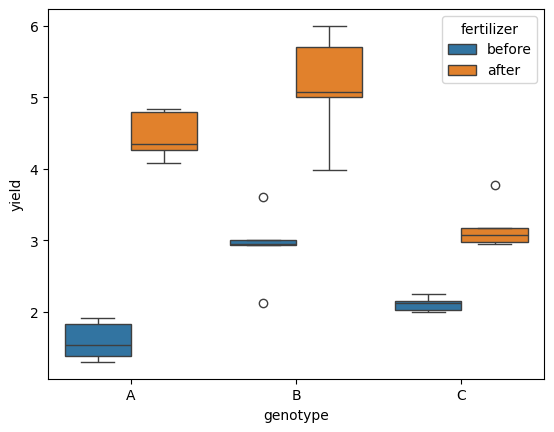

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='genotype', y='yield', hue='fertilizer', data=df_melt)
# ax = sns.swarmplot(x="genotype", y="yield", data=df_melt, color='#7d0013')

plt.show()


In [32]:
import pingouin as pg
pg.mixed_anova(dv='yield', between='genotype', within='fertilizer', subject='id', data=df_melt)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,genotype,10.242987,2,12,5.121493,16.351889,3.741297e-04,0.731566,NaN
1,fertilizer,31.868213,1,12,31.868213,373.404574,2.083410e-10,0.968864,1.0
2,Interaction,4.100347,2,12,2.050173,24.022184,6.371677e-05,0.800148,NaN


/home/xenakas/.venv/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x7f21e41c2a20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


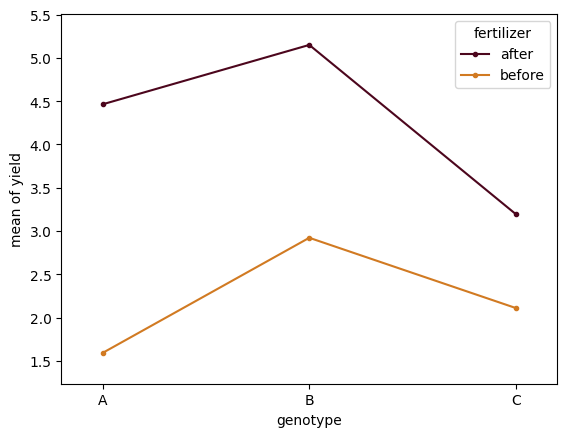

In [33]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df_melt['genotype'], trace=df_melt['fertilizer'], response=df_melt['yield'], 
    colors=['#4c061d','#d17a22'])
plt.show()


In [34]:
import pingouin as pg
pg.sphericity(data=df_melt, dv='yield', subject='id', within='fertilizer')

(True, nan, nan, 1, 1.0)

In [35]:
df_melt['factor_comb']=df_melt["genotype"] + '-'+df_melt["fertilizer"]
pg.normality(df_melt, dv='yield', group='factor_comb')

,W,pval,normal
factor_comb,,,
A-before,0.908932,0.461201,True
B-before,0.897502,0.396233,True
C-before,0.956608,0.784187,True
A-after,0.891106,0.362694,True
B-after,0.943001,0.687225,True
C-after,0.779155,0.054206,True


In [36]:
df_melt_before = pd.melt(df.reset_index(), id_vars=['id', 'genotype'], value_vars=['before'])
df_melt_after = pd.melt(df.reset_index(), id_vars=['id', 'genotype'], value_vars=['after'])

In [37]:
pg.homoscedasticity(df_melt_before, dv='value', group='genotype')

,W,pval,equal_var
levene,1.122517,0.35736,True


In [38]:
pg.homoscedasticity(df_melt_after, dv='value', group='genotype')

,W,pval,equal_var
levene,1.35042,0.295825,True


In [39]:
# df

In [40]:
# pg.box_m()

### ANCOVA

In [41]:
import pandas as pd
df=pd.read_csv("ancova_data.csv")
df.head(10)

,genotype,height,yield
0,A,10.0,20.0
1,A,11.5,22.0
2,A,12.0,24.0
3,A,12.9,24.0
4,A,13.4,26.0
5,A,14.2,27.0
6,A,15.0,27.0
7,A,15.9,27.2
8,A,16.6,27.0
9,A,16.4,27.5


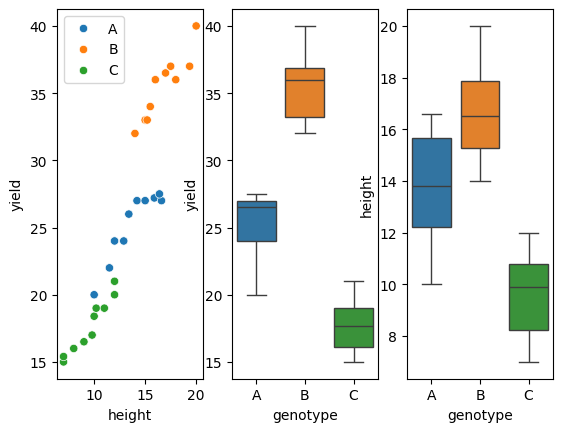

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="height", y="yield", hue=df.genotype.tolist(), ax=axs[0])
sns.boxplot(data=df, x="genotype", y="yield", hue=df.genotype.tolist(), ax=axs[1])
sns.boxplot(data=df, x="genotype", y="height", hue=df.genotype.tolist(), ax=axs[2])
plt.show()

In [43]:
from pingouin import ancova
ancova(data=df, dv='yield', covar='height', between='genotype')
# output

,Source,SS,DF,F,p-unc,np2
0,genotype,193.232458,2,141.352709,1.072947e-14,0.915777
1,height,132.695696,1,194.138152,1.429323e-13,0.881892
2,Residual,17.771304,26,NaN,NaN,NaN
